# GA Data Science 19 (DAT19) - Class 5
## Developing Mastery of Pandas, Numpy & Bokeh
####  

Justin Breucop (with parts from Craig Sakuma)

## Lab goals

- NumPy: Entering the Matrix
- Pandas: DataFrames as Bamboo
- Bokeh: Picture-Perfect Visuals

##NumPy
As we've seen in lecture, linear algebra is the branch of mathematics describing navigation between different vector spaces. This core concept is very important as a big piece of data cleansing is converting data into various formats and certain algorithms require data to be in a specific shape.

NumPy is a package designed to be used in scientific computing, and specifically around building N-dimensional array objects.

###Creating an array

In [1]:
import numpy as np
a = np.arange(25).reshape(5,5)
# arange(n) is a function that creates a 1 row array of integers of length n 
# reshape(M,N) is a method converts a list to a matrix of size MxN
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

We can convert from lists to arrays. Note however unlike lists, elements of an array all have to be of the same datatype.

In [2]:
alist = [[ 0,  1,  2,  3,  4],[ 5,  6,  7,  8,  9],[10, 11, 12, 13, 14],[15, 16, 17, 18, 19],[20, 21, 22, 23, 24]]
type(alist)

list

In [3]:
np.array(alist)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [4]:
biga = a*10
biga

array([[  0,  10,  20,  30,  40],
       [ 50,  60,  70,  80,  90],
       [100, 110, 120, 130, 140],
       [150, 160, 170, 180, 190],
       [200, 210, 220, 230, 240]])

In [5]:
print biga.mean()
print biga.mean(0) #Average per column
biga.mean(1) #average per row
# type(biga.mean(1))

120.0
[ 100.  110.  120.  130.  140.]


array([  20.,   70.,  120.,  170.,  220.])

In [6]:
bigm = np.matrix(biga-20)
bigm

bigm*biga

matrix([[  5000,   5000,   5000,   5000,   5000],
        [ 30000,  32500,  35000,  37500,  40000],
        [ 55000,  60000,  65000,  70000,  75000],
        [ 80000,  87500,  95000, 102500, 110000],
        [105000, 115000, 125000, 135000, 145000]])

In [7]:
np.linalg.inv(biga-20)

array([[ -1.20181075e+14,   8.72384672e+13,   9.19201624e+13,
          3.51685731e+13,  -9.41461278e+13],
       [  1.29915327e+14,  -4.82534697e+14,   2.33187505e+14,
          4.61567773e+14,  -3.42135908e+14],
       [  1.65462487e+14,   6.77256761e+14,  -7.62120739e+14,
         -1.16937875e+15,   1.08878024e+15],
       [ -2.39946656e+14,  -2.55863299e+14,   4.56998312e+14,
          8.13379896e+14,  -7.74568253e+14],
       [  6.47499164e+13,  -2.60972319e+13,  -1.99852408e+13,
         -1.40737488e+14,   1.22070045e+14]])

####Slices

In [8]:
bigm = np.array(bigm)
bigm[0]

array([-20, -10,   0,  10,  20])

In [9]:
#Same thing, but demonstrating the full slice with a colon
biga[0,:]
biga

array([[  0,  10,  20,  30,  40],
       [ 50,  60,  70,  80,  90],
       [100, 110, 120, 130, 140],
       [150, 160, 170, 180, 190],
       [200, 210, 220, 230, 240]])

In [10]:
biga[:,3]

array([ 30,  80, 130, 180, 230])

Slice rules work for even more complex dimensional data

In [11]:
compa = np.arange(30).reshape(5,3,2)
compa

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]],

       [[24, 25],
        [26, 27],
        [28, 29]]])

In [13]:
# lets describe it
print compa.shape
print compa.ndim
print compa.dtype

(5L, 3L, 2L)
3
int32


In [18]:
compa[2,:,0]

array([12, 14, 16])

In [20]:
compa[0,:,0]

array([0, 2, 4])

In [21]:
compa[0,0,0] = 5.9
compa[0,0,0]

5

Numpy tries to resolve conflicting datatypes, sometimes to our dismay

In [23]:
compa = compa.astype(float)
compa[0,0,0] = 5.75
compa[0,0,0]
compa

array([[[  5.75,   1.  ],
        [  2.  ,   3.  ],
        [  4.  ,   5.  ]],

       [[  6.  ,   7.  ],
        [  8.  ,   9.  ],
        [ 10.  ,  11.  ]],

       [[ 12.  ,  13.  ],
        [ 14.  ,  15.  ],
        [ 16.  ,  17.  ]],

       [[ 18.  ,  19.  ],
        [ 20.  ,  21.  ],
        [ 22.  ,  23.  ]],

       [[ 24.  ,  25.  ],
        [ 26.  ,  27.  ],
        [ 28.  ,  29.  ]]])

####Random Numbers
Random numbers are very helpful and are necessary at times for testing data pipelines and running statistical analyses. Functions for creating random values are under numpy.random.

In [30]:
#Create a randomized array
rm = np.random.normal(0,10,(5,5))
rm

array([[ -4.62151223,  -5.81716732,  -4.83607292,   8.66678779,
        -19.46485404],
       [  0.96435268,   4.92474812,  -7.55558801,  -4.05888557,
         -8.96944547],
       [ -7.6837444 ,  20.24980695,  -3.3649158 , -15.51230026,
         -7.57714668],
       [ -2.93319668,   3.75655307, -14.57480022,   6.13848936,
          1.87198528],
       [-11.2895119 ,  -8.21175792,  -0.60079185,   3.58033348,
         10.79768312]])

In [31]:
rm.shape

(5L, 5L)

In [32]:
print rm.mean()
print rm.mean(0) #Average per column
print rm.mean(1) #average per row

-2.64483805654
[-5.11272251  2.98043658 -6.18643376 -0.23711504 -4.66835556]
[-5.21456374 -2.93896365 -2.77766004 -1.14819384 -1.14480901]


In [ ]:
# for a different Normal Distribution, use np.random.normal
rm = np.random.normal(5,9,(30,30))
rm

In [ ]:
print rm.mean(), "which is hopefully close to the input mean"
print rm.var(), "which variance = stdev squared"
print np.median(rm)

Find more distributions and random functions here: http://docs.scipy.org/doc/numpy/reference/routines.random.html

###Exercise 1
1) Create a 4x5 array of integers numbering 0 to 19.

In [33]:
np.arange(20).reshape(4,5)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

2) Create a 50x500 array with a mean of 20 and variance of 100. Save it to a variable called  `biggie`

In [36]:
biggie = np.random.normal(20,10,(50,500))
print biggie.shape
print biggie.mean()
print biggie.var()

(50L, 500L)
19.9420521207
100.724022139


3) Change the mean of the array to a value within 1 of 0 and the variance within 1 of 25. Think about what the mean and the variance represent and try using various mathematical operations.

In [37]:
morph = (biggie - 20)/2
print morph.mean()
print morph.var()

-0.0289739396634
25.1810055349


##Pandas: DataFrames as Bamboo
You've already been exposed to dataframes in the previous labs so lets get into dataframes and how we can work with them.

In [54]:
import pandas as pd

data = pd.read_csv("../data/titanic.csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [52]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [63]:
data[data.Age > 65][['Name','Age']]

,Name,Age
33,"Wheadon, Mr. Edward H",66.0
96,"Goldschmidt, Mr. George B",71.0
116,"Connors, Mr. Patrick",70.5
493,"Artagaveytia, Mr. Ramon",71.0
630,"Barkworth, Mr. Algernon Henry Wilson",80.0
672,"Mitchell, Mr. Henry Michael",70.0
745,"Crosby, Capt. Edward Gifford",70.0
851,"Svensson, Mr. Johan",74.0


In [55]:
data[(data.Age==11)&(data.SibSp==5)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11,5,2,CA 2144,46.9,NaN,S


In [56]:
data[(data.Age==11)|(data.SibSp==5)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11,5,2,CA 2144,46.9000,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16,5,2,CA 2144,46.9000,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1,5,2,CA 2144,46.9000,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9,5,2,CA 2144,46.9000,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11,4,2,347082,31.2750,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14,5,2,CA 2144,46.9000,NaN,S
731,732,0,3,"Hassan, Mr. Houssein G N",male,11,0,0,2699,18.7875,NaN,C
802,803,1,1,"Carter, Master. William Thornton II",male,11,1,2,113760,120.0000,B96 B98,S


###Cleaning Data

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


####Working with nulls
Exclude data

In [67]:
# data[data.Age.isnull()]
data[data.Age.notnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S


In [68]:
# You can also just replace the nulls
data.Age[data.Age.isnull()].fillna(0)

5      0
17     0
19     0
26     0
28     0
29     0
31     0
32     0
36     0
42     0
45     0
46     0
47     0
48     0
55     0
64     0
65     0
76     0
77     0
82     0
87     0
95     0
101    0
107    0
109    0
121    0
126    0
128    0
140    0
154    0
      ..
718    0
727    0
732    0
738    0
739    0
740    0
760    0
766    0
768    0
773    0
776    0
778    0
783    0
790    0
792    0
793    0
815    0
825    0
826    0
828    0
832    0
837    0
839    0
846    0
849    0
859    0
863    0
868    0
878    0
888    0
Name: Age, dtype: float64

In [69]:
#Replace with the mean to preserve statistical values
avg_age = data.Age[data.Age.notnull()].mean()
print avg_age
data.Age.fillna(avg_age)

29.6991176471


0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
5      29.699118
6      54.000000
7       2.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
12     20.000000
13     39.000000
14     14.000000
15     55.000000
16      2.000000
17     29.699118
18     31.000000
19     29.699118
20     35.000000
21     34.000000
22     15.000000
23     28.000000
24      8.000000
25     38.000000
26     29.699118
27     19.000000
28     29.699118
29     29.699118
         ...    
861    21.000000
862    48.000000
863    29.699118
864    24.000000
865    42.000000
866    27.000000
867    31.000000
868    29.699118
869     4.000000
870    26.000000
871    47.000000
872    33.000000
873    47.000000
874    28.000000
875    15.000000
876    20.000000
877    19.000000
878    29.699118
879    56.000000
880    25.000000
881    33.000000
882    22.000000
883    28.000000
884    25.000000
885    39.000000
886    27.000000
887    19.000000
888    29.6991

####Replace with random normal distribution

In [70]:
# Get values of mean and standard deviation
data.Age[data.Age.notnull()].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [74]:
# Replace null values with 
data.Age.fillna(np.random.normal(29.7,14.5),inplace=True)

In [75]:
data.Age.fillna(np.random.normal(29.7,14.5)).describe()

count    891.000000
mean      29.391342
std       13.016718
min        0.420000
25%       22.000000
50%       28.149806
75%       35.000000
max       80.000000
Name: Age, dtype: float64

###Convert categorical data to numerical

In [76]:
data.Sex=='female'

0      False
1       True
2       True
3       True
4      False
5      False
6      False
7      False
8       True
9       True
10      True
11      True
12     False
13     False
14      True
15      True
16     False
17     False
18      True
19      True
20     False
21     False
22      True
23     False
24      True
25      True
26     False
27     False
28      True
29     False
       ...  
861    False
862     True
863     True
864    False
865     True
866     True
867    False
868    False
869    False
870    False
871     True
872    False
873    False
874     True
875     True
876    False
877    False
878    False
879     True
880     True
881    False
882     True
883    False
884    False
885     True
886    False
887     True
888     True
889    False
890    False
Name: Sex, dtype: bool

In [77]:
data.rename(columns={'Sex':'Is Female'},inplace=True)
data['Is Female']=data['Is Female']=='female'
data.head()

,PassengerId,Survived,Pclass,Name,Is Female,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",False,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",True,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",True,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",True,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",False,35,0,0,373450,8.0500,NaN,S


In [ ]:
# get unique values of Embarked
data.Embarked.unique()

In [ ]:
# replace values with numbers
data.Embarked.replace(['S', 'C', 'Q'],[1,2,3],inplace=True)
data.head()

###Selecting with .loc, .iloc, & .ix

Selecting data in pandas can be tricky. The main takeaway is that .loc looks for index labels, .iloc looks for the integer index position, and .ix can be a mix. 

In [ ]:
df = pd.DataFrame(np.random.randn(6,4),index=list('abcdef'),columns=list('ABCD'))
df

In [ ]:
df.loc['f']

In [ ]:
df.iloc[len(df.index)-1]

In [ ]:
df.A.ix['f'] == df.A.ix[-1]

In [ ]:
cc = list('cookies')
cc[-4]

###Group by

In [82]:
# Find average age of passengers that survived vs. died
data.groupby(['Pclass','Survived'])['Age'].mean()

Pclass  Survived
1       0           40.586211
        1           34.625127
2       0           33.155141
        1           26.004934
3       0           26.992689
        1           22.790028
Name: Age, dtype: float64

In [79]:
# Count number of female passengers
data.groupby('Is Female')['PassengerId'].count()

Is Female
False    577
True     314
Name: PassengerId, dtype: int64

In [80]:
data.groupby(['Survived','Pclass'])['PassengerId'].count()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: PassengerId, dtype: int64

###Apply

In [ ]:


# Convert ticket prices to USD
data.Fare.apply(lambda x: x*1.6)

In [ ]:
data.Name

In [ ]:
data.Name.apply(lambda x: x.split(",")[0])

###Concatenate

In [ ]:
data_first_half = data.iloc[0:10,:]
data_first_half.info()

In [ ]:
data_second_half = data.iloc[10:,:]

remake_data = pd.concat([data_first_half,data_second_half])
remake_data.info()

###EXERCISE 2
1) Replace Pclass numbers with 'First Class', 'Second Class', 'Third Class'

2) What was the average ticket price for survivors vs. dead passengers?

###Bonus!!!
Round all ages to the nearest year using `apply`

##Bokeh: Picture Perfect Visuals

To install Bokeh, go to a terminal and type:

`conda install bokeh` 

Bokeh is built by the same people that created Anaconda (Continuum Analytics) and is designed out of the box for web display, making it nice for creating presentation ready, interactive visuals quickly. Labs in this course will be shown in Bokeh. Checkout http://bokeh.pydata.org/en/latest/docs/quickstart.html#concepts to see some of the range of capabilities.


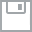
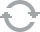
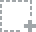
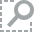
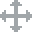
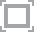
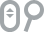
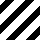
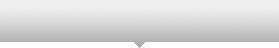
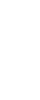
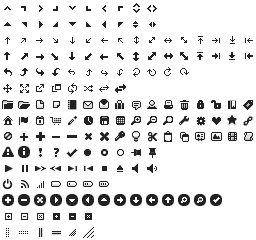
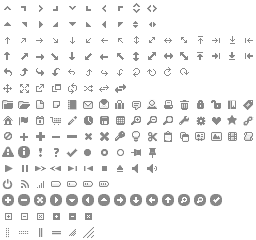
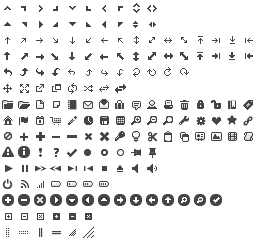
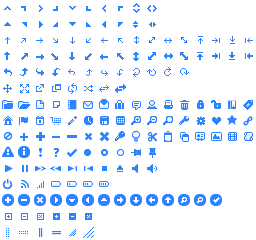
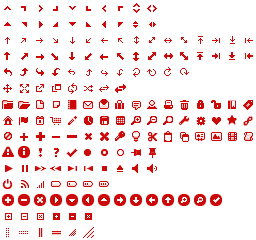
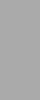
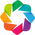
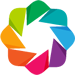

In [84]:
from bokeh.plotting import figure, output_notebook,show,vplot
output_notebook()

In [94]:
import pandas.io.data
import datetime
aapl = pd.io.data.get_data_yahoo('FB', 
                                 start=datetime.datetime(2015, 4, 1), 
                                 end=datetime.datetime(2015, 4, 28))



In [98]:
x*y.mean()/x.mean()

Date
2015-04-01    82.332731
2015-04-02    82.913040
2015-04-06    82.261465
2015-04-07    83.707147
2015-04-08    83.320269
2015-04-09    83.187920
2015-04-10    83.391543
2015-04-13    83.401718
2015-04-14    83.931127
2015-04-15    83.758047
2015-04-16    83.635882
2015-04-17    81.823687
2015-04-20    82.709418
2015-04-21    85.051022
2015-04-22    85.163013
2015-04-23    83.900586
2015-04-24    82.953764
2015-04-27    83.106471
2015-04-28    81.681155
Name: Low, dtype: float64

In [99]:


# prepare some data
x = aapl.Low
y = aapl.High

# create a new plot with a title and axis labels
p = figure(title="Stock High vs. Low", x_axis_label='Low', y_axis_label='High')

# These are glyphs
p.circle(x, y,size=20,alpha=0.4,)
p.line(x,x*y.mean()/x.mean())

# show the results
show(p)

In [97]:
aapl.Low

Date
2015-04-01    80.870003
2015-04-02    81.440002
2015-04-06    80.800003
2015-04-07    82.220001
2015-04-08    81.839996
2015-04-09    81.709999
2015-04-10    81.910004
2015-04-13    81.919998
2015-04-14    82.440002
2015-04-15    82.269997
2015-04-16    82.150002
2015-04-17    80.370003
2015-04-20    81.239998
2015-04-21    83.540001
2015-04-22    83.650002
2015-04-23    82.410004
2015-04-24    81.480003
2015-04-27    81.629997
2015-04-28    80.230003
Name: Low, dtype: float64

At its core, Bokeh is built up with Plots and Glyphs. Plots are created with the figure keyword and then glyphs are visuals that are added to the visualization. The visuals are scalable, interactive and savable. You can even create vectorized colors.

In [100]:
# prepare some data
N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = ["#%02x%02x%02x" % (r, g, 150) for r, g in zip(np.floor(50+2*x), np.floor(30+2*y))]

TOOLS="resize,crosshair,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select"

# create a new plot with the tools above, and explicit ranges
p = figure(tools=TOOLS, x_range=(0,100), y_range=(0,100))

# add a circle renderer with vecorized colors and sizes
p.circle(x,y, radius=radii, fill_color=colors, fill_alpha=0.6, line_color=None)

# show the results
show(p)

In [105]:
p1 = figure(title="Titanic Ages Dead",x_axis_label = 'Age',y_axis_label = 'Count')
#construct the histogram
hist, edges = np.histogram(data.Age[data.Survived==0].values, density=True, bins=50)
#Construct your x axis
x = np.linspace(data.Age.min(),data.Age.max(),100)
#add the bars, scaling the value to the full count of people
p1.quad(top=hist*len(data.Age), bottom=0, left=edges[:-1], right=edges[1:],line_color='black')

p2 = figure(title="Titanic Ages Survived",x_axis_label = 'Age',y_axis_label = 'Count')

hist, edges = np.histogram(data.Age[data.Survived==1].values, density=True, bins=50)
x = np.linspace(data.Age.min(),data.Age.max(),100)
p2.quad(top=hist*len(data.Age), bottom=0, left=edges[:-1], right=edges[1:],line_color='black')


dummy_line=range(0,len(x)+1)


show(vplot(p1,p2))

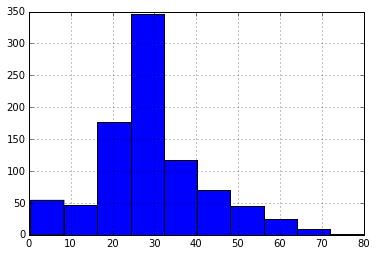

In [104]:
%matplotlib inline
data.Age.hist()